In [30]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Prealpi'
raceDate = '10/12/2023'
surface = 'gravel'
competition = '-'

link = 'https://www.ewrc-results.com/results/82367-prealpi-master-show-2023/?s='
startat, no_ss=443719, int(6)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [31]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

/tmp/ipykernel_4983/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_4983/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_4983/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_4983/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_4983/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.']

In [32]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [33]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
#rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#3,Marchioro Nico,R5/Rally2,5:23.3,-,80.2,1,Prealpi,10/12/2023,gravel,-,1
1,2,#8,Romagna Simone,R5/Rally2,5:23.6,+0.3 + 0.3,80.1 0.04,1,Prealpi,10/12/2023,gravel,-,2
2,3,#7,Sandrin Andrea,R5/Rally2,5:26.6,+3.3 + 3.0,79.4 0.46,1,Prealpi,10/12/2023,gravel,-,3
3,4,#9,Cesaro Leonard,R5/Rally2,5:26.8,+3.5 + 0.2,79.3 0.49,1,Prealpi,10/12/2023,gravel,-,4
4,5,#30,Toffano Giovan,R5/Rally2,5:27.0,+3.7 + 0.2,79.3 0.51,1,Prealpi,10/12/2023,gravel,-,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,#97,Dalla Vecchia,Rally4/R2,7:05.0,+1:48.8 + 6.5,61.4 15.0,6,Prealpi,10/12/2023,gravel,-,87
87,88,#123,Zanarella Anto,A6,7:09.0,+1:52.8 + 4.0,60.8 15.6,6,Prealpi,10/12/2023,gravel,-,88
88,89,#119,Battistuzzi C.,Rally5/R1,7:11.0,+1:54.8 + 2.0,60.6 15.8,6,Prealpi,10/12/2023,gravel,-,89
89,90,#89,Gabrici Fabio,Rally4,7:16.2,+2:00.0 + 5.2,59.8 16.6,6,Prealpi,10/12/2023,gravel,-,90


In [34]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
#rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stagesrally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
#rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [35]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [36]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))


ValueError: Your DataFrame has more than 100 rows and will produce a huge image file, possibly causing your computer to crash. Override this error by explicitly setting `max_rows`. Use -1 for all rows.

In [37]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Marchioro Nico,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,1,323.3
1,Romagna Simone,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,2,323.6
2,Sandrin Andrea,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,3,326.6
3,Cesaro Leonard,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,4,326.8
4,Toffano Giovan,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,5,327.0
...,...,...,...,...,...,...,...,...,...
86,Dalla Vecchia,Rally4/R2,6,Prealpi,10/12/2023,gravel,-,87,425.0
87,Zanarella Anto,A6,6,Prealpi,10/12/2023,gravel,-,88,429.0
88,Battistuzzi C.,Rally5/R1,6,Prealpi,10/12/2023,gravel,-,89,431.0
89,Gabrici Fabio,Rally4,6,Prealpi,10/12/2023,gravel,-,90,436.2


In [38]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race    ss Gr/Cl                          
Prealpi 1  A5                        400.5
           A6                        391.5
           A7                        390.7
           A8                        380.0
           K11                       393.6
...                                    ...
        6  Rally4/R2                 371.4
           Rally4/R2 Under 25        375.8
           Rally5                    378.7
           Rally5 Under 25           389.2
           Rally5/R1                 431.0

[128 rows x 1 columns]

In [39]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Marchioro Nico,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,1,323.3,323.3,323.3,0.0,0.0,0.000000,01
1,Romagna Simone,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,2,323.6,323.3,323.3,0.3,0.3,0.092793,01
2,Sandrin Andrea,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,3,326.6,323.3,323.3,3.3,3.3,1.020724,01
3,Cesaro Leonard,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,4,326.8,323.3,323.3,3.5,3.5,1.082586,01
4,Toffano Giovan,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,5,327.0,323.3,323.3,3.7,3.7,1.144448,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Citron Marco,A5,6,Prealpi,10/12/2023,gravel,-,79,400.3,400.3,316.2,84.1,0.0,0.000000,06
585,Manera Luca -,Ra5N,6,Prealpi,10/12/2023,gravel,-,82,406.1,406.1,316.2,89.9,0.0,0.000000,06
586,Trentin Angelo,A7,6,Prealpi,10/12/2023,gravel,-,85,415.4,415.4,316.2,99.2,0.0,0.000000,06
587,Dal Cin Wilmo,N2,6,Prealpi,10/12/2023,gravel,-,86,418.5,418.5,316.2,102.3,0.0,0.000000,06


In [40]:
Group = 'Rally4'
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['RC1', 'RC2']))]
ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2.csv')

In [41]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05,06
Crew,,,,,,
Callegaro Ricc,10.5,22.7,16.1,14.6,14.5,29.5
Cappellati Rud,17.5,7.3,5.4,7.4,1.1,14.8
Carlet Ermes,62.2,NaN,NaN,NaN,NaN,NaN
Casarotto Andr,24.7,25.8,12.1,10.8,9.2,25.1
Casonato Rober,2.2,6.5,7.7,8.3,8.3,17.0
Cocco Giovanni,0.0,0.0,0.0,0.0,0.0,0.2
Dalla Vecchia,89.8,84.0,57.6,59.8,64.6,53.6
De Marco Franc,18.7,33.9,21.5,NaN,NaN,NaN
De Sanctis F.,84.3,68.6,67.8,65.0,73.5,141.4


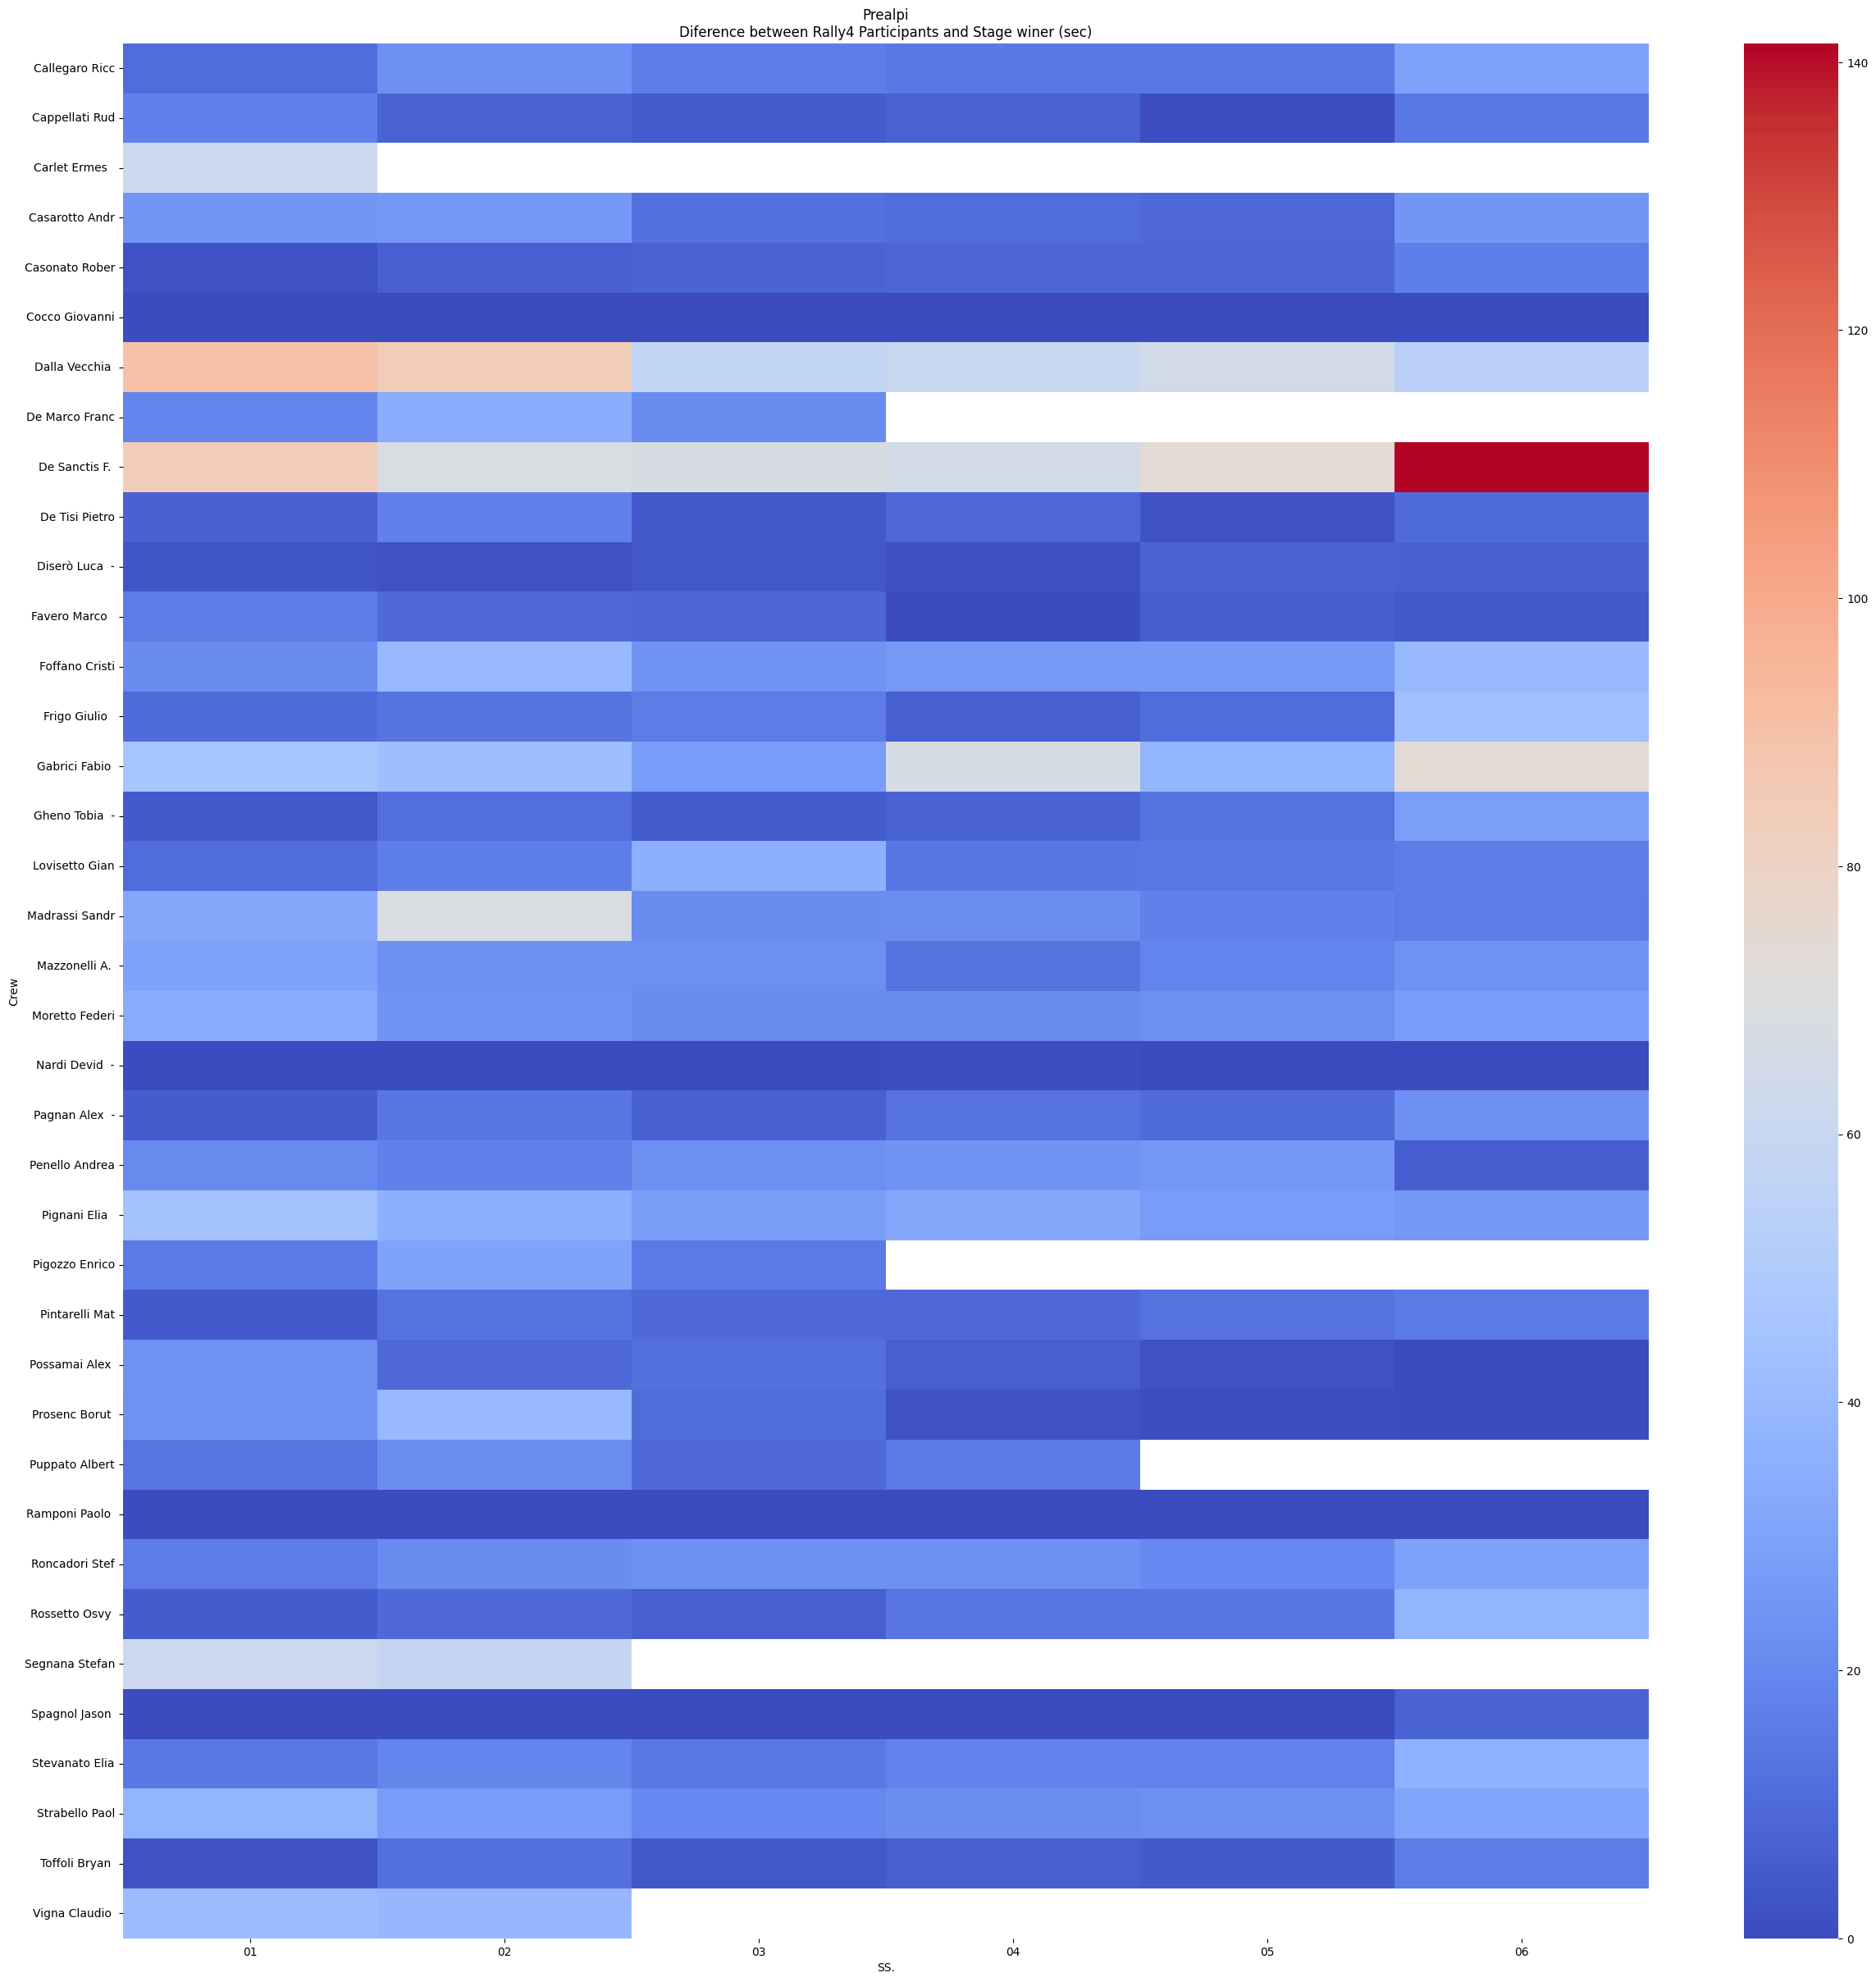

In [42]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
#plt.savefig("Heatmap_" + Group + ".png")
plt.show()

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Marchioro Nico,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,1,323.3
1,Romagna Simone,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,2,323.6
2,Sandrin Andrea,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,3,326.6
3,Cesaro Leonard,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,4,326.8
4,Toffano Giovan,R5/Rally2,1,Prealpi,10/12/2023,gravel,-,5,327.0
...,...,...,...,...,...,...,...,...,...
86,Dalla Vecchia,Rally4/R2,6,Prealpi,10/12/2023,gravel,-,87,425.0
87,Zanarella Anto,A6,6,Prealpi,10/12/2023,gravel,-,88,429.0
88,Battistuzzi C.,Rally5/R1,6,Prealpi,10/12/2023,gravel,-,89,431.0
89,Gabrici Fabio,Rally4,6,Prealpi,10/12/2023,gravel,-,90,436.2


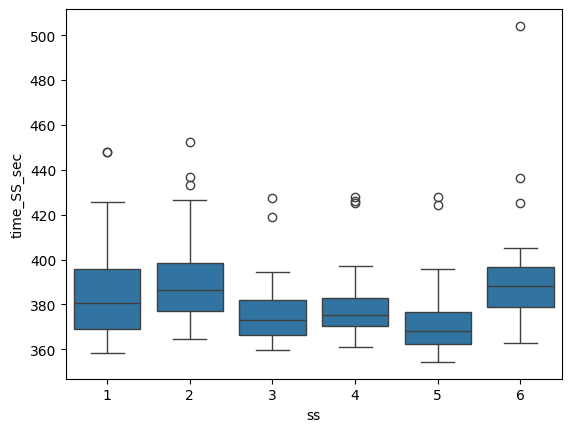

In [43]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot_" + Group + ".png")rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
#rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

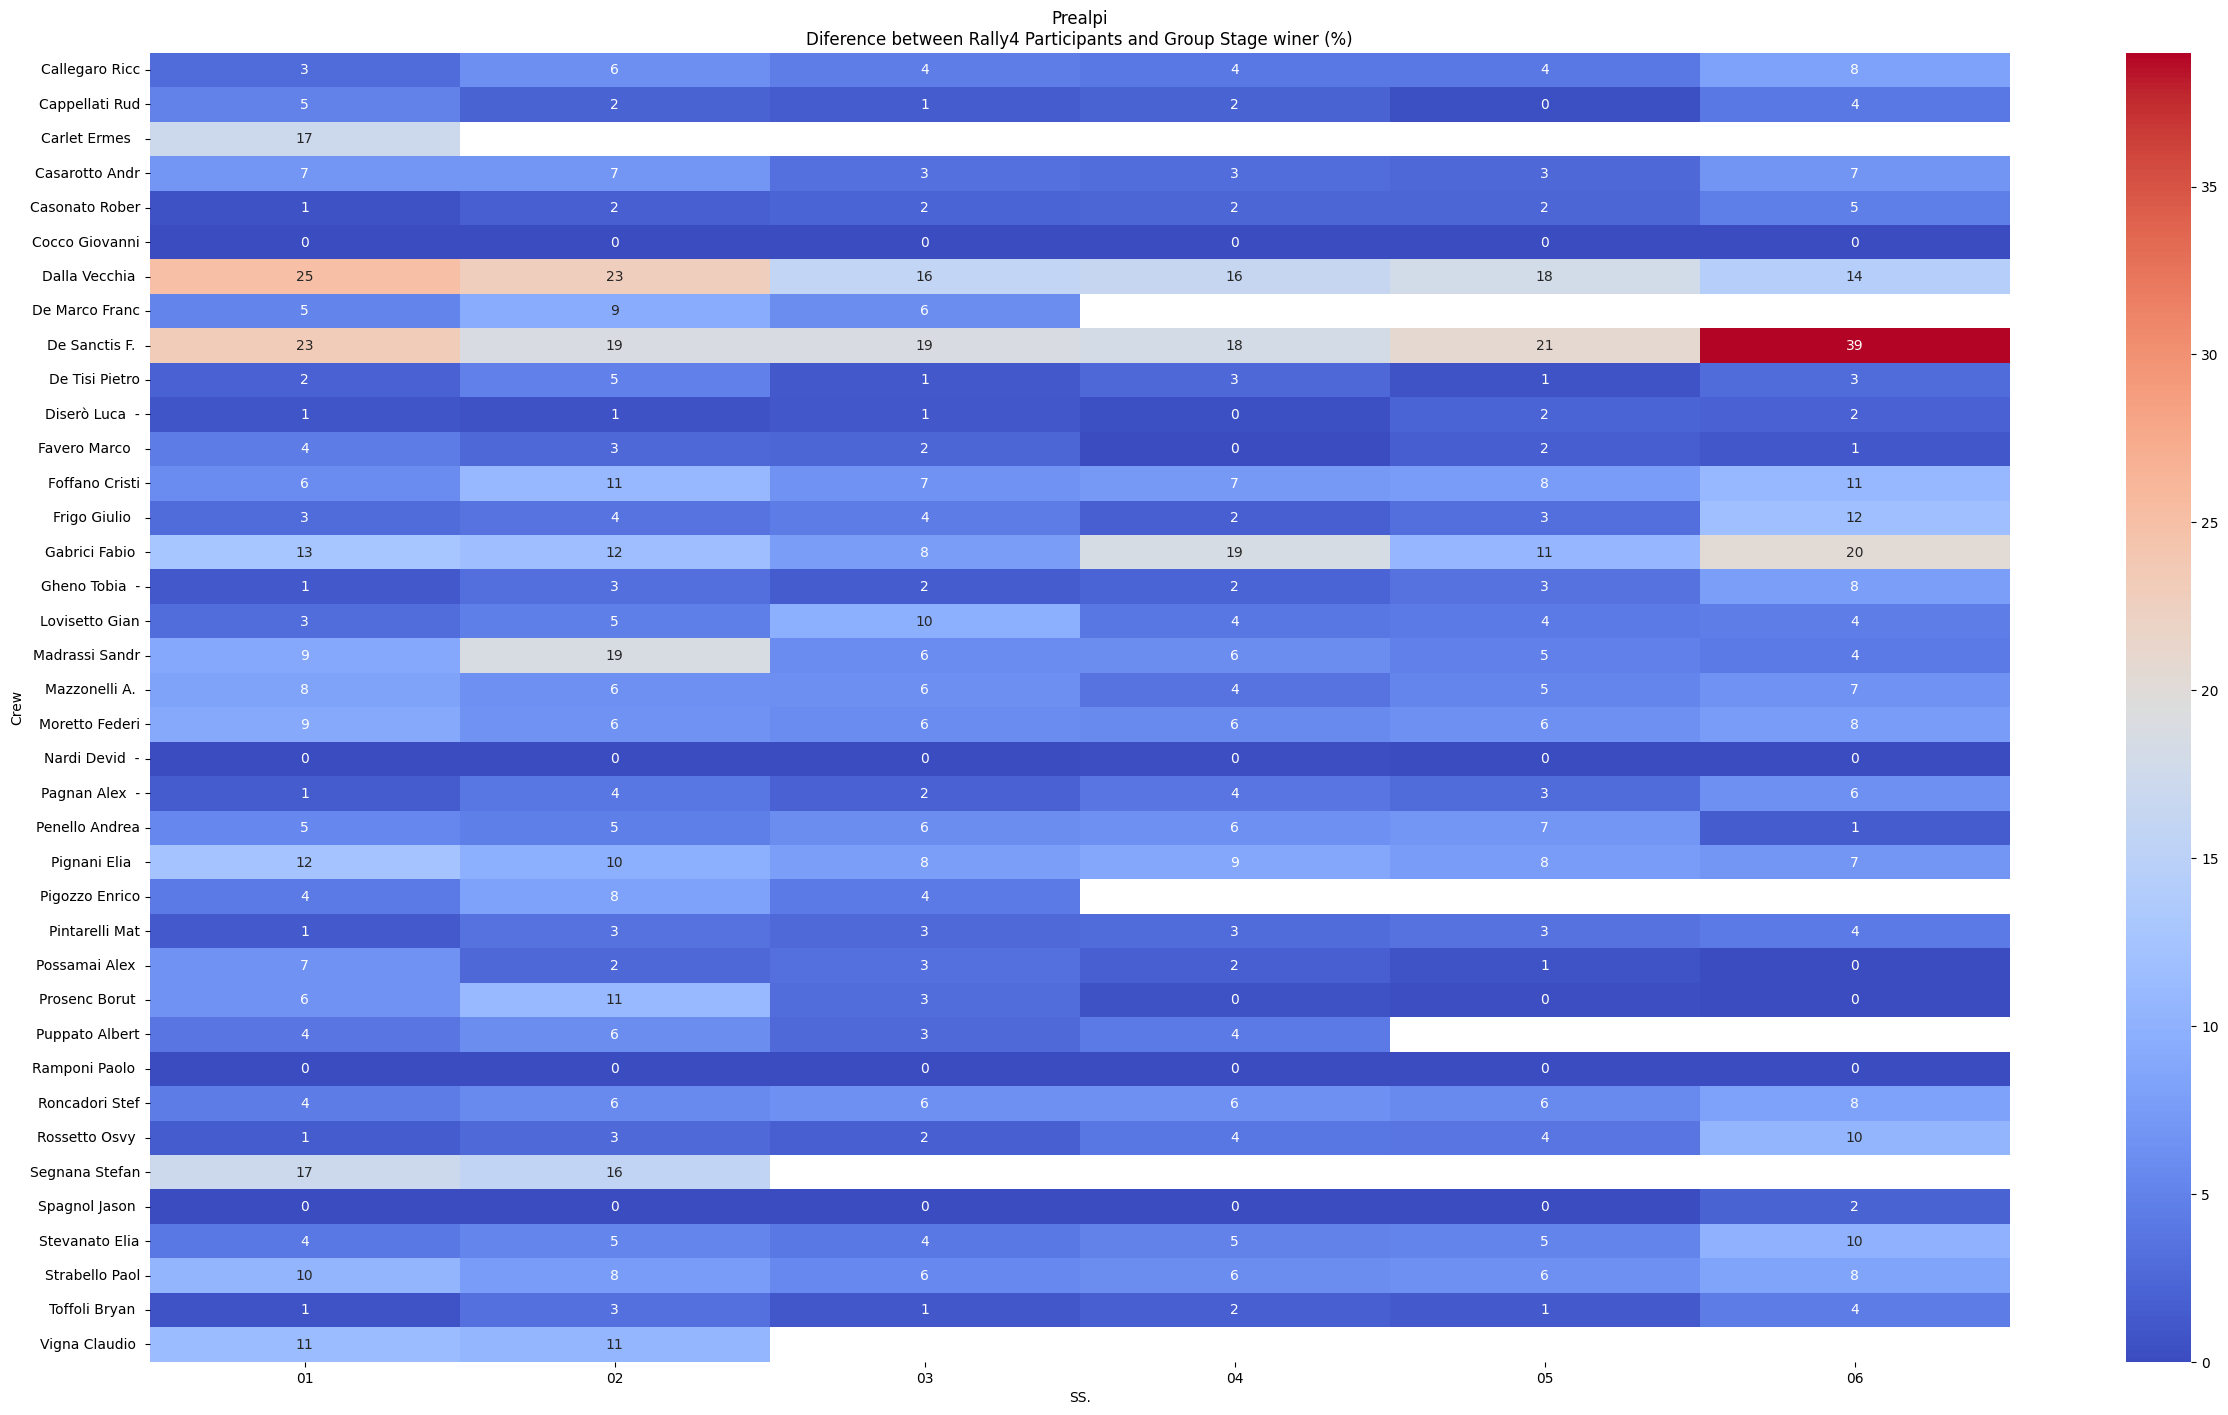

In [45]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".jpg")
plt.show()